In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# !pip install pycountry
# !pip install geopandas
# !pip install mapclassify
# !pip install geoplot
import pycountry
import geopandas
import geoplot
from shapely.geometry import Point, Polygon

ModuleNotFoundError: ignored

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Science in Practice/Data and input tool/Processed Data/media_event_type_1.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Event Date 1',
       'Event Date 2', 'Event-Type 1', 'Event-Type-health 1',
       'Event-Type-health 2', 'Event-Type-health 3', 'Event-Type-health 4',
       'Event-Type-Social 1', 'Event-Type-Social 2', 'Event-Type-Social 3',
       'Event-Type-Social 4', 'Event-Type-Social 5', 'Event-Type-Social 6',
       'Event-Type-Social 7', 'Event-Type-Movements 1',
       'Event-Type-Movements 2', 'Event-Type-Movements 3',
       'Event-Type-Movements 4', 'Event-Type-Movements 5',
       'Event-Type-Movements 6', 'Event-Type Security 1',
       'Event-Type Security 2', 'Event-Type Security 3',
       'Event-Type Security 4', 'Number of infected migrants',
       'Number of migrant in quarantine', 'Number of deaths at sea',
       'Number of deaths when crossing borders',
       'Number of rescued people when crossing borders',
       'Number of arrived people by sea',
       'Number of arrived people through boarders',
       'Number of 

# Bar Plots

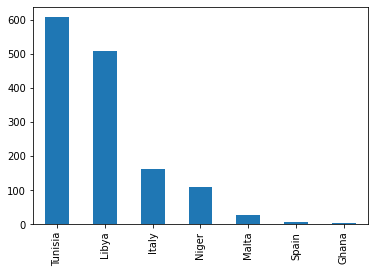

In [ ]:
df['Country'].value_counts().plot.bar()

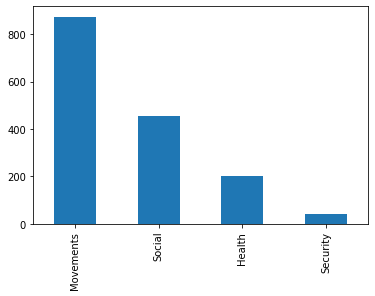

In [ ]:
df['Event-Type 1'].value_counts().plot.bar()

In [5]:
df_Libya = df
df_Tunisia = df
df_Italy = df
df_Niger = df
df_Malta = df
df_Spain = df
df_Ghana = df

df_Libya = df_Libya[df_Libya.Country == 'Libya']
df_Tunisia = df_Tunisia[df_Tunisia.Country == 'Tunisia']
df_Italy = df_Italy[df_Italy.Country == 'Italy']
df_Niger = df_Niger[df_Niger.Country == 'Niger']
df_Malta = df_Malta[df_Malta.Country == 'Malta']
df_Spain = df_Spain[df_Spain.Country == 'Spain']
df_Ghana = df_Ghana[df_Ghana.Country == 'Ghana']

Text(0.5, 1.0, 'Libya event type quantities')

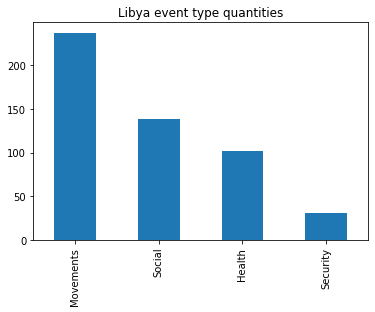

In [ ]:
# Number of event type 1 Libya
df_Libya['Event-Type 1'].value_counts().plot.bar()
plt.title("Libya event type quantities")


Text(0.5, 1.0, 'Tunisia event type quantities')

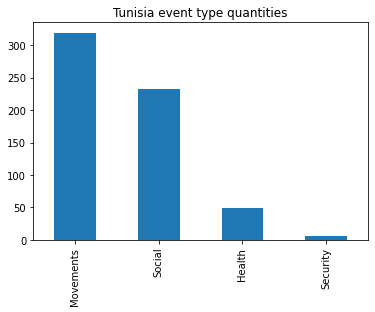

In [ ]:
# Number of event type 1 Tunisia
df_Tunisia['Event-Type 1'].value_counts().plot.bar()
plt.title("Tunisia event type quantities")


Text(0.5, 1.0, 'Italy event type quantities')

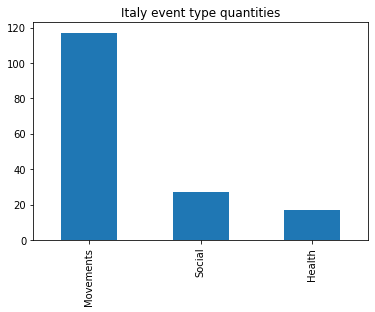

In [ ]:
# Number of event type 1 Italy
df_Italy['Event-Type 1'].value_counts().plot.bar()
plt.title("Italy event type quantities")


Text(0.5, 1.0, 'Niger event type quantities')

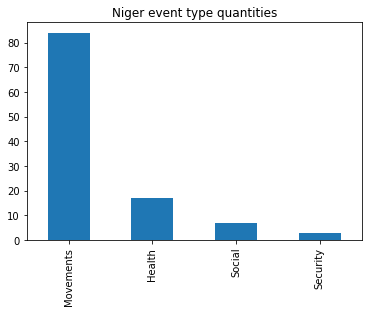

In [6]:
# Number of event type 1 Niger
df_Niger['Event-Type 1'].value_counts().plot.bar()
plt.title("Niger event type quantities")


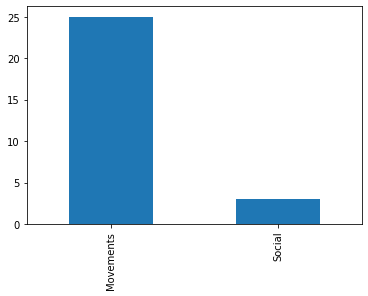

In [ ]:
# Number of event type 1 Malta
df_Malta['Event-Type 1'].value_counts().plot.bar()

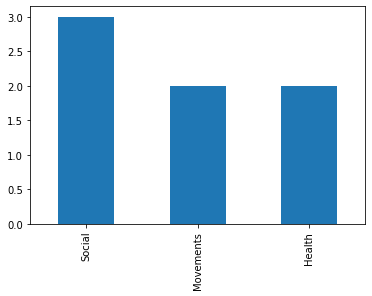

In [ ]:
# Number of event type 1 Spain
df_Spain['Event-Type 1'].value_counts().plot.bar()

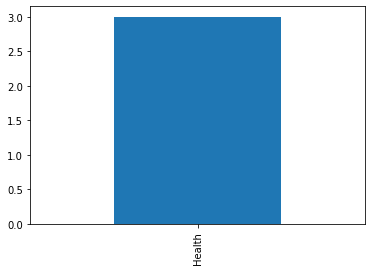

In [ ]:
# Number of event type 1 Ghana
df_Ghana['Event-Type 1'].value_counts().plot.bar()

KeyError: ignored

# Maps

In [ ]:
# generate country code  based on country name 
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
df['CODE']=alpha3code(df['Country'])

In [ ]:
# Prepare geopandas data
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
world = world[['CODE', 'continent', 'name','gdp_md_est', 'geometry']]

In [ ]:
# Select most occuring events
events = df[['CODE','Event-Type 1']].value_counts()
events = events.loc[events.groupby('CODE').idxmax()].to_frame().reset_index()
events = events[['CODE','Event-Type 1']]

merge=pd.merge(world,events,on='CODE', how='left')

# fill missing data
merge = merge.fillna('No data')

# Merge again with our location data which contains each country’s latitude and longitude
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
merge=merge.merge(location,on='name').reset_index()


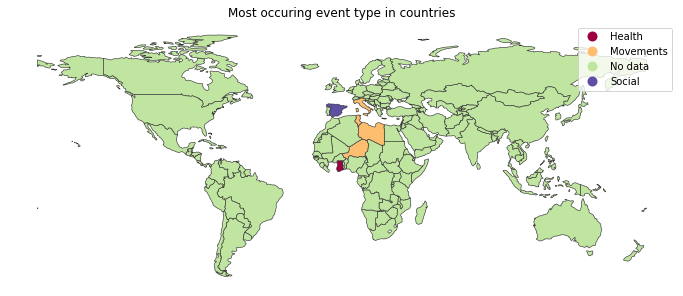

In [ ]:
# plot confirmed cases world map 
fig, ax =plt.subplots(figsize=(12,12))
merge.plot(column='Event-Type 1', categorical=True, cmap='Spectral', linewidth=.6, edgecolor='0.2', 
            legend=True, ax=ax)
plt.title('Most occuring event type in countries',fontsize=12)
ax.set_axis_off()
plt.show()

In [ ]:
africa = world[world['continent']=='Africa']
extra = pd.merge(world,events,on='CODE')

africa = pd.concat([africa,extra])
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(df['Longitude-city1_degrees'], df['Latitude-city1_degrees'])]
geo_df = geopandas.GeoDataFrame(df, 
                          crs = crs, 
                          geometry = geometry)
geo_df=geo_df[['Event-Type 1', 'geometry']]

/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


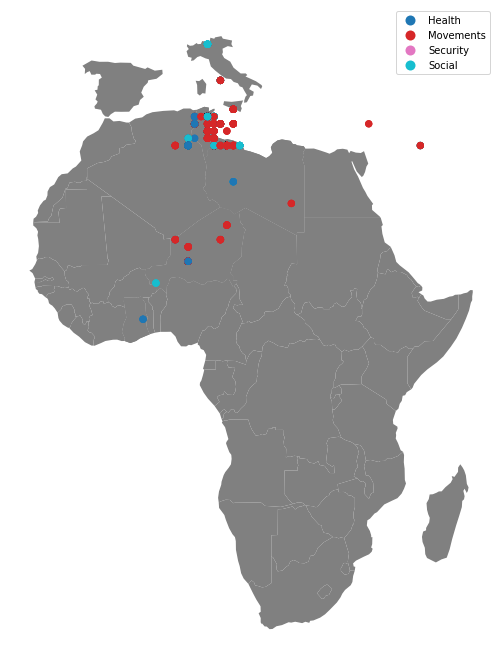

In [ ]:
fig,ax = plt.subplots(figsize=(12, 12))
africa.plot(ax=ax, color='gray')
geo_df.plot(column = 'Event-Type 1', categorical = True,marker='o', markersize=40, ax=ax, legend=True)
ax.set_axis_off()
plt.show()